# Aprendizagem - Homework II
### II. Programming - Grupo99
(ist1106059, ist1106329)

1- 

In [13]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

df = pd.read_csv('heart-disease.csv')

# separar features do target
x = df.drop(columns=['target'])
y = df['target']

# inicializar 5-fold stratified cross-validation com shuffling
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# inicializar modelos kNN e naive Bayes
kNN = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

kNN_accuracies = []
naive_bayes_accuracies = []

for train_idx, test_idx in strat_k_fold.split(x, y):
  x_train = x.iloc[train_idx]
  y_train = y.iloc[train_idx]
  
  x_test = x.iloc[test_idx]
  y_test = y.iloc[test_idx]

  # modelo kNN
  kNN.fit(x_train, y_train)
  y_predictions_kNN = kNN.predict(x_test)
  kNN_accuracies.append(accuracy_score(y_test, y_predictions_kNN))

  # modelo Naive Bayes
  naive_bayes.fit(x_train, y_train)
  y_predictions_naive_bayes = naive_bayes.predict(x_test)
  naive_bayes_accuracies.append(accuracy_score(y_test, y_predictions_naive_bayes))


a) 
Ao analisar o boxplot abaixo, vemos que o modelo Naive Bayes apresentou uma precisão significativamente maior em comparação com o kNN, sendo a sua mediana próxima de 0.83 em comparação com 0.67 do kNN.
Adicionalmente, o modelo Naive Bayes aparenta ser mais estável já que tem uma menor dispersão dos dados no boxplot (caixa menor e intervalos interquartis mais pequenos), o que indica que a variação das precisões de cada fold é relativamente baixa. O kNN, por outro lado, apresentou uma variação maior nestas precisões, o que indica menos estabilidade.
Estes resultados podem dever-se ao facto de o kNN ser sensível à escala das variáveis, já que calcula distâncias para fazer previsões, ao contrário do modelo Naive Bayes que, por ser um classificador probabilístico com suposições simples (independência condicional entre as features e distribuição Gaussiana para todas as variáveis), consegue manter uma performance mais estável mesmo com dados que não estejam perfeitamente normalizados ou escalados.


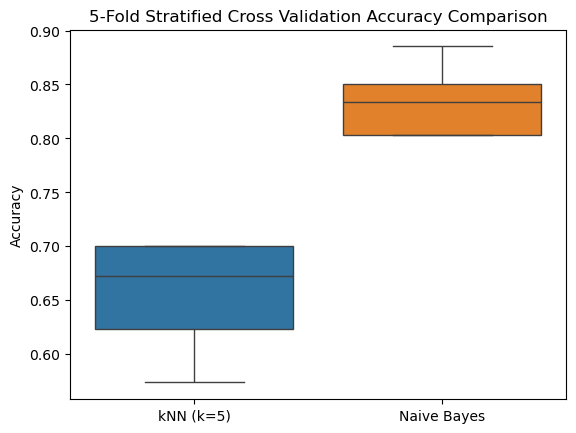

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=[kNN_accuracies, naive_bayes_accuracies])
plt.xticks([0, 1], ['kNN (k=5)', 'Naive Bayes'])
plt.title('5-Fold Stratified Cross Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

b)
Comparando os resultados do modelo kNN antes e depois de fazer Min-Max Scaling, conseguimos perceber que este modelo beneficiou bastante deste escalonamento dos dados. Primeiramente, a precisão melhorou bastante, já que a média das 5-folds está próxima de 0.82 e a mediana é agora superior a 0.83 (quase igual ao modelo Naive Bayes). Para além disso, a variação da precisão também reduziu (pois os intervalos interquartis estão menores), aumentando assim a estabilidade do modelo. Isto faz todo o sentido uma vez que, se os dados estiverem escalados e normalizados, features com magnitudes muito elevadas já não vão ter um maior impacto no cálculo das distâncias necessário para classificar os dados com o modelo kNN.

Quanto ao modelo Naive Bayes, a mediana das precisões permaneceu praticamente inalterada (perto dos 0.83) e o boxplot mostra pouca ou nenhuma variação nas precisões dos 5-folds.  




Estabilidade: A variação entre os resultados dos diferentes folds diminuiu, como pode ser visto no boxplot, onde a dispersão foi reduzida e os intervalos interquartis são menores. Isso indica que o Min-Max Scaler melhorou a consistência dos resultados do Naive Bayes, mesmo que o impacto na média de precisão tenha sido mínimo.
Explicação: Embora o Naive Bayes não dependa da escala das variáveis da mesma forma que o kNN, o pré-processamento dos dados parece ter ajudado a reduzir a variabilidade entre os diferentes folds. Isso pode ser porque o escalonamento das variáveis as tornou mais homogêneas, o que suaviza eventuais discrepâncias no ajuste dos parâmetros das distribuições gaussianas que o modelo pressupõe

Precisão média do modelo kNN: 0.8184
Precisão média do modelo Naive Bayes: 0.8350


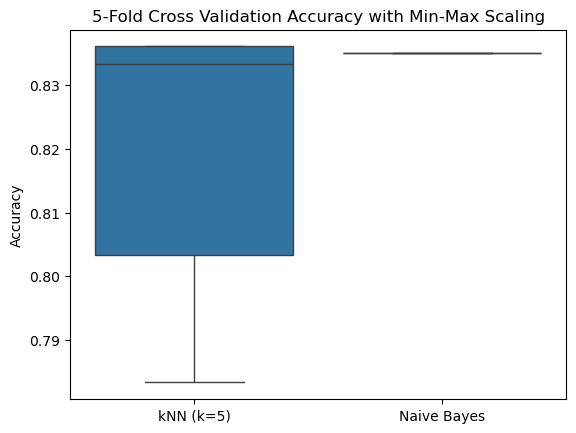

In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

kNN_accuracies_minmax = []
naive_bayes_accuracies_minmax = []

for train_idx, test_idx in strat_k_fold.split(x, y):
  x_train = x.iloc[train_idx]
  y_train = y.iloc[train_idx]
  
  x_test = x.iloc[test_idx]
  y_test = y.iloc[test_idx]

  # Min-Max Scaler
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  # modelo kNN
  kNN.fit(x_train, y_train)
  y_predictions_kNN = kNN.predict(x_test)
  kNN_accuracies_minmax.append(accuracy_score(y_test, y_predictions_kNN))

  # modelo Naive Bayes
  naive_bayes.fit(x_train, y_train)
  y_predictions_naive_bayes = naive_bayes.predict(x_test)
  naive_bayes_accuracies_minmax.append(accuracy_score(y_test, y_predictions_naive_bayes))

# calcular médias das precisões
kNN_avg_accuracy = np.mean(kNN_accuracies_minmax)
naive_bayes_avg_accuracy = np.mean(naive_bayes_accuracies_minmax)

print(f"Precisão média do modelo kNN: {kNN_avg_accuracy:.4f}")
print(f"Precisão média do modelo Naive Bayes: {naive_bayes_avg_accuracy:.4f}")

sns.boxplot(data=[kNN_accuracies_minmax, naive_bayes_avg_accuracy])
plt.xticks([0, 1], ['kNN (k=5)', 'Naive Bayes'])
plt.title('5-Fold Cross Validation Accuracy with Min-Max Scaling')
plt.ylabel('Accuracy')
plt.show()

c)

In [31]:
from scipy.stats import ttest_rel

# Realizar o teste t
stat, p_value = ttest_rel(kNN_accuracies, naive_bayes_accuracies, alternative='greater')

# Imprimir o resultado do p-value
print(f'Estatística t: {stat:.4f}')
print(f'p-valor: {p_value:.4f}')

# Nível de significância
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos H0: O kNN é estatisticamente superior ao Naive Bayes.")
else:
    print("Não rejeitamos H0: O kNN não é estatisticamente superior ao Naive Bayes.")

Estatística t: -6.6903
p-valor: 0.9987
Não rejeitamos H0: O kNN não é estatisticamente superior ao Naive Bayes.


2.
    a)

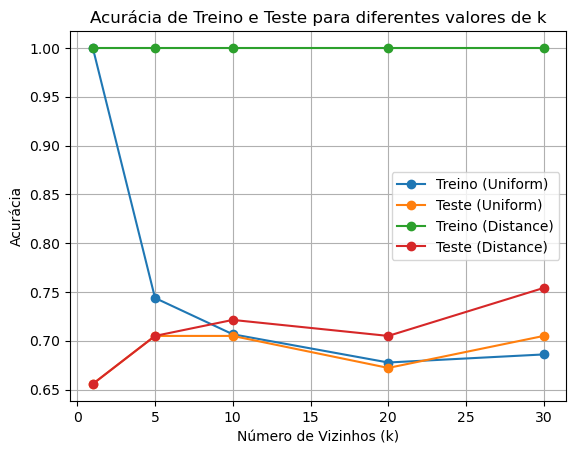

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("heart-disease.csv")

#Separar as features (x) e o target (y)
x = data.drop(columns=['target']) 
y = data['target']  

#Dividir em conjunto de treino e teste (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

k_values = [1, 5, 10, 20, 30]

train_accuracy_uniform = []
test_accuracy_uniform = []
train_accuracy_distance = []
test_accuracy_distance = []

#Treinar o modelo para cada valor de k com pesos uniformes e por distância
for k in k_values:
    #pesos uniformes
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(x_train, y_train)
    train_accuracy_uniform.append(knn_uniform.score(x_train, y_train))
    test_accuracy_uniform.append(knn_uniform.score(x_test, y_test))
    
    #pesos por distância
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(x_train, y_train)
    train_accuracy_distance.append(knn_distance.score(x_train, y_train))
    test_accuracy_distance.append(knn_distance.score(x_test, y_test))

plt.plot(k_values, train_accuracy_uniform, label='Treino (Uniform)', marker='o')
plt.plot(k_values, test_accuracy_uniform, label='Teste (Uniform)', marker='o')
plt.plot(k_values, train_accuracy_distance, label='Treino (Distance)', marker='o')
plt.plot(k_values, test_accuracy_distance, label='Teste (Distance)', marker='o')

plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia de Treino e Teste para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()
